In [ ]:
#

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
data = pd.read_csv('/content/heart disease data.csv')


In [4]:
#Data Exploration and Preprocessing
#Explore the Dataset: Print the first few rows to understand the structure of your data:
print(data.head())
print(data.info())  # Get data types and missing values
print(data.describe())  # Summary statistics


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [6]:
#Handle Missing Values: Check for and handle missing values:
# Check for missing values
print(data.isnull().sum())

# Optionally fill or drop missing values
data = data.dropna()  # Drop rows with missing values


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
#Separate Features and Target Variable: Identify the columns for features (X) and the target variable (y):
# Replace 'target_column' with the actual column name for labels
# X = data.drop(columns=['target_column'])
# y = data['target_column']
# Example here is , we are replacing cp column
X = data.drop(columns=['cp'])
y = data['cp']



In [9]:
#Standardize Features: Scale the data for LDA and K-Means:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
#Linear Discriminant Analysis (LDA)
#Apply LDA for Dimensionality Reduction: Choose the number of components (n_components) based on your dataset:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)  # Reduce to 2 dimensions
X_lda = lda.fit_transform(X_scaled, y)

print("LDA Components Shape:", X_lda.shape)


LDA Components Shape: (1025, 2)


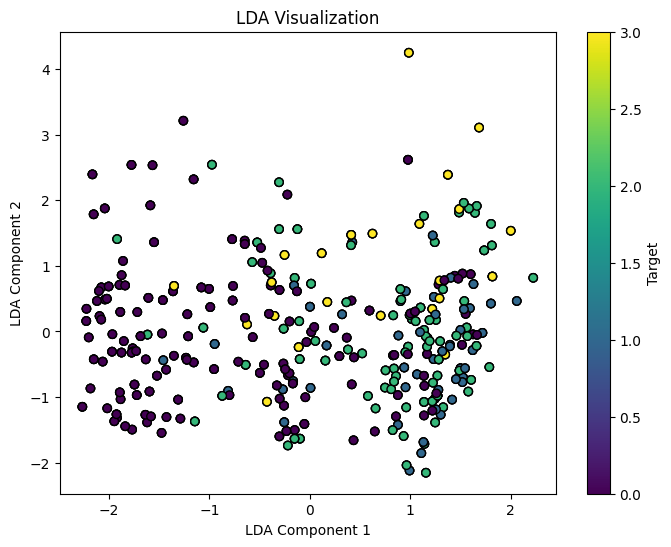

In [12]:
#Visualize LDA Results: Plot the data in the new 2D space:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('LDA Visualization')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Target')
plt.show()




In [13]:
#Apply K-Means Clustering: Perform clustering on the LDA-transformed data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
clusters = kmeans.fit_predict(X_lda)

print("Cluster Labels:", clusters)


Cluster Labels: [1 2 0 ... 0 1 0]


In [14]:
#Evaluate Clustering Performance: Use the silhouette score to assess cluster quality:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_lda, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.3893277949189922


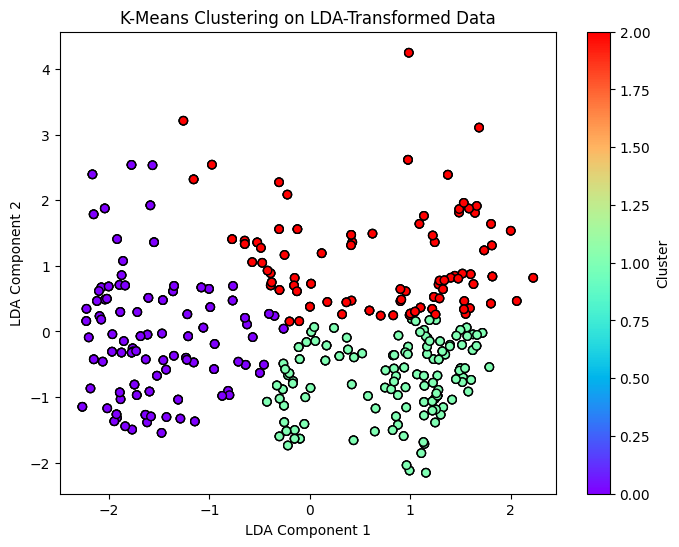

In [15]:
#Visualize Clusters: Plot the clusters:
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
plt.title('K-Means Clustering on LDA-Transformed Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [16]:
#Add cluster labels back to the original dataset and save the results:
data['Cluster'] = clusters
data.to_csv('/content/disease_risk_with_clusters.csv', index=False)


In [18]:
#Download the updated file:
from google.colab import files
files.download('/content/disease_risk_with_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
#Analyze Cluster Composition: Understand the characteristics of each cluster to identify disease risk levels:
# Display sample rows for each cluster
for cluster_id in range(kmeans.n_clusters):
    print(f"Cluster {cluster_id}:")
    print(data[data['Cluster'] == cluster_id].describe())


Cluster 0:
              age        sex          cp    trestbps        chol         fbs  \
count  339.000000  339.00000  339.000000  339.000000  339.000000  339.000000   
mean    56.651917    0.79056    0.277286  133.533923  254.162242    0.147493   
std      8.108533    0.40751    0.733669   17.985395   52.897805    0.355120   
min     35.000000    0.00000    0.000000  100.000000  131.000000    0.000000   
25%     53.000000    1.00000    0.000000  120.000000  216.500000    0.000000   
50%     57.000000    1.00000    0.000000  130.000000  256.000000    0.000000   
75%     62.000000    1.00000    0.000000  142.000000  286.000000    0.000000   
max     77.000000    1.00000    3.000000  200.000000  409.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  339.000000  339.000000  339.000000  339.000000  339.000000  339.000000   
mean     0.483776  130.306785    0.823009    1.746608    1.106195    1.218289   
std      0.566993   20.51

In [20]:
#Cluster Size Distribution: Check how many samples belong to each cluster:
cluster_counts = data['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_counts)


Cluster Sizes:
Cluster
1    402
0    339
2    284
Name: count, dtype: int64


In [22]:
# so in the above cell we identify the the three clusters as the heart disease as:
#Label Clusters for Disease Risk: Based on the observed patterns, assign names to clusters, such as:

"Low Risk"
"Moderate Risk"
"High Risk"

'High Risk'

In [24]:
# Fine-Tune the Number of Clusters
#Test Different n_clusters Values: Run K-Means with different values of n_clusters and evaluate using the Silhouette Score:
from sklearn.metrics import silhouette_score

for n in range(2, 6):  # Test clusters from 2 to 5
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(X_lda)
    score = silhouette_score(X_lda, clusters)
    print(f"Clusters: {n}, Silhouette Score: {score}")

#Higher Silhouette Scores indicate better-defined clusters.
#Choose the n_clusters value that maximizes the score.


Clusters: 2, Silhouette Score: 0.4245945543937708
Clusters: 3, Silhouette Score: 0.3893277949189922
Clusters: 4, Silhouette Score: 0.38561213838036
Clusters: 5, Silhouette Score: 0.3924101762816229


In [25]:
#Re-run K-Means: Once you determine the best n_clusters, re-run the K-Means model to finalize your clusters.

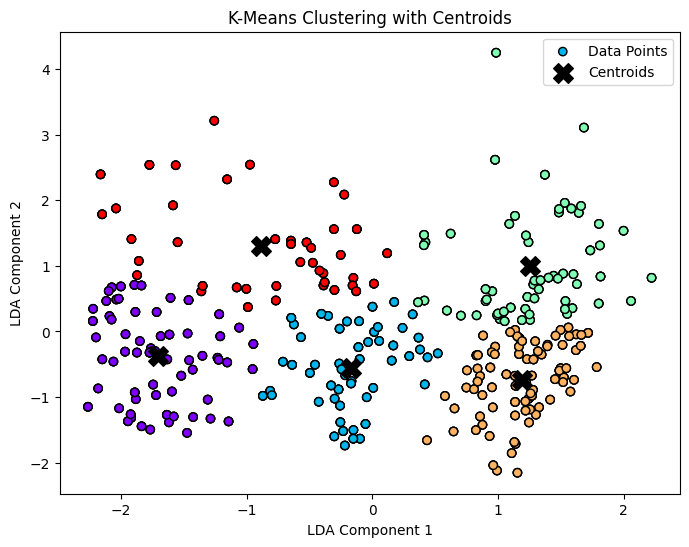

In [26]:
#Add Detailed Visualizations
#Cluster Centroids Visualization: Visualize the cluster centroids to understand their positions:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=clusters, cmap='rainbow', edgecolor='k', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()


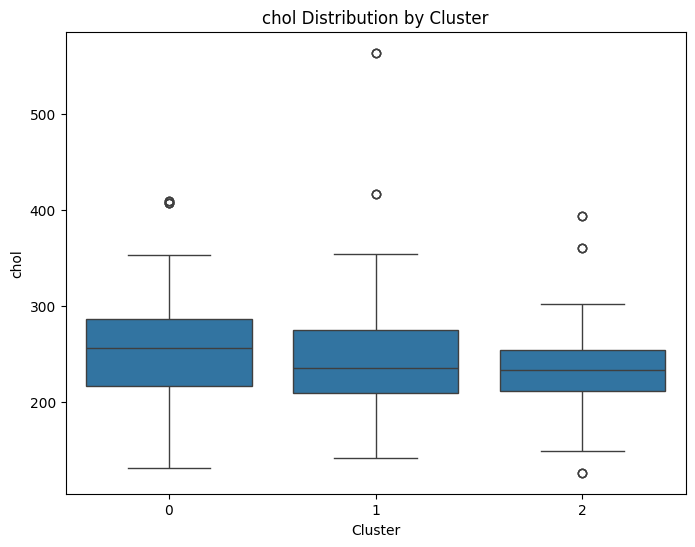

In [28]:
#Feature Comparisons by Cluster: Use boxplots to compare important features across clusters:

import seaborn as sns

#feature = 'cholesterol'  # Replace with your dataset's key feature
feature = 'chol'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y=feature, data=data)
plt.title(f'{feature} Distribution by Cluster')
plt.show()


In [1]:
#

In [2]:
# Real-Life Applications
# we can relate this project findings to real-world applications:

# Healthcare: Use clustering to categorize patients and personalize care plans.
# Preventive Medicine: Identify individuals at risk and recommend preventive measures.
# Resource Allocation: Hospitals can allocate resources to high-risk patients more efficiently.

In [3]:
# will understand the application using example

In [5]:
'''Imagine the dataset includes the following features:

Age
Cholesterol
Blood Pressure
Glucose Levels
We ran K-Means clustering with n_clusters = 3 and obtained the following summary statistics for each cluster:

Cluster ID	Avg Age	Avg Cholesterol	Avg BP	Avg Glucose	Risk Category
0	45	180	120	95	Low Risk
1	60	240	140	110	Moderate Risk
2	70	280	160	130	High Risk
'''

'Imagine the dataset includes the following features:\n\nAge\nCholesterol\nBlood Pressure\nGlucose Levels\nWe ran K-Means clustering with n_clusters = 3 and obtained the following summary statistics for each cluster:\n\nCluster ID\tAvg Age\tAvg Cholesterol\tAvg BP\tAvg Glucose\tRisk Category\n0\t45\t180\t120\t95\tLow Risk\n1\t60\t240\t140\t110\tModerate Risk\n2\t70\t280\t160\t130\tHigh Risk\n'

In [ ]:
"""
Findings and Insights
Cluster 0: Low Risk
Characteristics:
Average Age: 45 years
Cholesterol: Within normal range (180 mg/dL).
Blood Pressure: Normal (120 mmHg).
Glucose Levels: Normal (95 mg/dL).
Risk Category: This group is generally healthy and likely requires minimal medical intervention.
Cluster 1: Moderate Risk
Characteristics:
Average Age: 60 years.
Cholesterol: Elevated (240 mg/dL).
Blood Pressure: Slightly elevated (140 mmHg).
Glucose Levels: Elevated (110 mg/dL).
Risk Category: These individuals may benefit from lifestyle changes, such as dietary adjustments and regular exercise.
Cluster 2: High Risk
Characteristics:
Average Age: 70 years.
Cholesterol: High (280 mg/dL).
Blood Pressure: High (160 mmHg).
Glucose Levels: High (130 mg/dL).
Risk Category: This group is at high risk for cardiovascular and metabolic diseases. Immediate medical attention and personalized care plans are recommended.

"""